In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [72]:
df = pd.read_csv("Mall_Customers.csv")
data_len = len(df)
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [73]:
df.shape

(200, 5)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


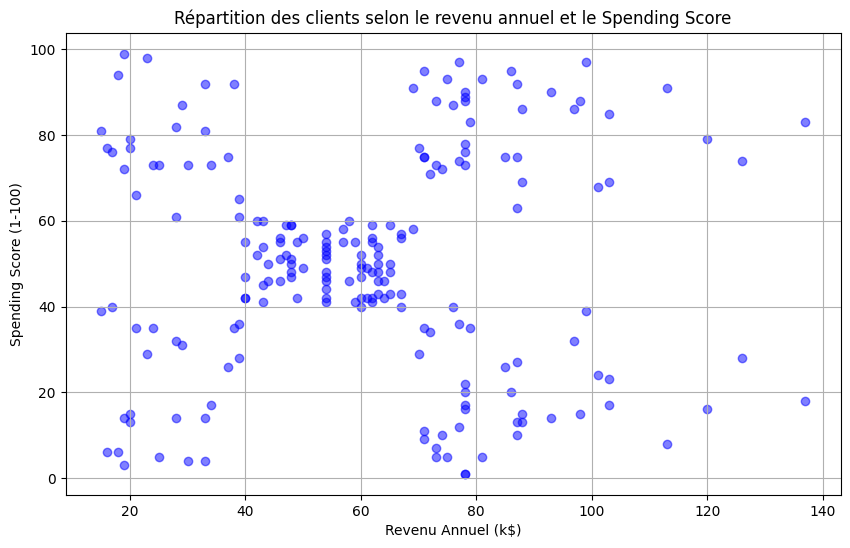

In [75]:
# Visualisation de la distribution des clients
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='b', alpha=0.5)
plt.title('Répartition des clients selon le revenu annuel et le Spending Score')
plt.xlabel('Revenu Annuel (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

In [76]:
def initialize_centroids(data, k):
    if (k <= 0):
        return []
    indices = random.sample(range(len(data)), k)
    points = [(float(data.iloc[i]['Annual Income (k$)']), float(data.iloc[i]['Spending Score (1-100)'])) for i in indices]
    return points

In [77]:
centroids = initialize_centroids(df, 5)
print(centroids)

[(63.0, 48.0), (126.0, 74.0), (78.0, 16.0), (78.0, 78.0), (40.0, 42.0)]


In [78]:
def assign_clusters(data, centroids):
    labels = []
    for i in range(data_len):
        distances = [math.sqrt((data.iloc[i]['Annual Income (k$)'] - centroids[j][0])**2 + (data.iloc[i]['Spending Score (1-100)'] - centroids[j][1])**2) for j in range(len(centroids))]
        labels.append(centroids[distances.index(min(distances))])
    return labels

In [94]:
test = assign_clusters(df, centroids)
test[:20]

[(26.304347826086957, 20.91304347826087),
 (25.727272727272727, 79.36363636363636),
 (26.304347826086957, 20.91304347826087),
 (25.727272727272727, 79.36363636363636),
 (26.304347826086957, 20.91304347826087),
 (25.727272727272727, 79.36363636363636),
 (26.304347826086957, 20.91304347826087),
 (25.727272727272727, 79.36363636363636),
 (26.304347826086957, 20.91304347826087),
 (25.727272727272727, 79.36363636363636),
 (26.304347826086957, 20.91304347826087),
 (25.727272727272727, 79.36363636363636),
 (26.304347826086957, 20.91304347826087),
 (25.727272727272727, 79.36363636363636),
 (26.304347826086957, 20.91304347826087),
 (25.727272727272727, 79.36363636363636),
 (26.304347826086957, 20.91304347826087),
 (25.727272727272727, 79.36363636363636),
 (26.304347826086957, 20.91304347826087),
 (25.727272727272727, 79.36363636363636)]

In [80]:
def update_centroids(data, labels, centroids, k):
    new_centroids = []
    for i in range(k):
        cluster_points = [j for j in range(data_len) if(labels[j] == centroids[i])]
        if (len(cluster_points) != 0):
            centroid_x = sum([data.iloc[j]['Annual Income (k$)'] for j in cluster_points]) / len(cluster_points)
            centroid_y = sum([data.iloc[j]['Spending Score (1-100)'] for j in cluster_points]) / len(cluster_points)
            new_centroids.append((float(centroid_x), float(centroid_y)))
        else :
            new_centroids.append((0, 0))
    return new_centroids

In [81]:
def kmeans(data, k, max_iter=100):
    centroids = initialize_centroids(data, k)

    for i in range(max_iter):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, centroids, k)
        centroids = new_centroids
    return labels, centroids

In [88]:
labels, centroids = kmeans(df, 5, max_iter=100)

clusters = [[i for i in range(data_len) if(labels[i] == centroid)] for centroid in centroids]

In [1]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'hotpink', 'orange', 'green']
for i in range(5):
    for j in clusters[i]:
        plt.scatter(df.iloc[j]['Annual Income (k$)'], df.iloc[j]['Spending Score (1-100)'], color=colors[i], alpha=0.5)
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], color='black', marker='x', s=100)
plt.title('Répartition des clients selon le revenu annuel et le Spending Score')
plt.xlabel('Revenu Annuel (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.savefig('CustomersSegmentation.png')
plt.show()

NameError: name 'plt' is not defined

# Analyse des Segments de Clients du Mall Customer Segmentation Data

## Introduction
L'objectif de cette analyse est de segmenter les clients d'un centre commercial en fonction de leurs revenus et de leurs comportements d'achat. Nous avons identifié cinq clusters distincts après l'application de l'algorithme de clustering K-Means. Voici une analyse détaillée de chaque segment et des recommandations stratégiques associées.

## Cluster 1: Earning High but Spending Less (Couleur orange)

### Caractéristiques
Les clients de ce cluster ont des revenus élevés mais un faible score de dépenses.

### Analyse
Ces clients peuvent être plus prudents dans leurs achats, préférant des produits de haute qualité mais limitant leurs dépenses. Ils peuvent aussi être plus sélectifs dans leurs choix, n'achetant que des produits qui correspondent à leurs besoins spécifiques.

### Stratégie Recommandée
- Proposer des **produits haut de gamme** ou **luxe** pour répondre aux besoins de ce groupe.
- Offrir des **services personnalisés** ou des expériences qui ajoutent de la valeur.
- Utiliser des **programmes de fidélité** pour encourager des achats plus fréquents.

## Cluster 2: Average in Terms of Earning and Spending (Couleur rouge)

### Caractéristiques
Les clients de ce cluster ont des revenus moyens et des comportements d'achat relativement modérés.

### Analyse
Ce groupe représente une large portion de la clientèle. Les clients sont modérés dans leurs achats, cherchant des produits de qualité à prix abordable. Ils sont sensibles aux promotions et aux offres spéciales.

### Stratégie Recommandée
- Proposer des **offres groupées** ou des **réductions** pour encourager des achats plus importants.
- Créer des **programmes de fidélité** pour inciter à l'achat récurrent.
- Offrir des **promotions ciblées** sur les produits populaires.

## Cluster 3: Earning High and Spending High (Couleur verte) [Target Set]

### Caractéristiques
Les clients de ce cluster ont à la fois des revenus élevés et un score de dépenses élevé, ce qui les rend très rentables.

### Analyse
Ce groupe est constitué des clients les plus rentables et les plus engagés. Ils recherchent des produits premium et des services exclusifs. C'est le groupe cible idéal pour les stratégies de marketing.

### Stratégie Recommandée
- Offrir des **produits exclusifs** et **haut de gamme**.
- Créer des **expériences sur mesure**, telles que des services VIP.
- Cibler les **campagnes publicitaires** spécifiquement pour ce groupe.
- Encourager les **achats répétés** avec des remises personnalisées.

## Cluster 4: Earning Less but Spending More (Couleur bleue)

### Caractéristiques
Ces clients ont des revenus plus faibles mais un score de dépenses relativement élevé.

### Analyse
Les clients de ce groupe ont un comportement d'achat intéressant. Bien qu'ils aient des revenus plus faibles, ils dépensent de manière régulière. Cela peut indiquer une préférence pour des achats fréquents mais à faible coût.

### Stratégie Recommandée
- Proposer des **produits à faible coût** mais attractifs.
- Offrir des **réductions fréquentes** pour attirer ce groupe.
- Créer des **packs de produits** ou des offres combinées pour offrir plus de valeur.
- Développer des **programmes de fidélité** pour encourager des achats réguliers.

## Cluster 5: Earning Less, Spending Less (Couleur rose)

### Caractéristiques
Les clients de ce cluster ont à la fois des revenus faibles et un faible score de dépenses.

### Analyse
Ce groupe peut être constitué de clients sensibles au prix, qui privilégient les produits à bas prix et recherchent constamment des offres spéciales.

### Stratégie Recommandée
- Offrir des **produits bon marché** ou des **promotions sur des articles essentiels**.
- Créer des **offres limitées** ou des **soldes** pour attirer ce groupe.
- Mettre en place des **programmes de fidélité** qui récompensent les achats réguliers.
- Proposer des **options de financement** pour rendre les achats plus accessibles.

## Conclusion
Cette segmentation permet de mieux comprendre les comportements d'achat des clients et d'adopter des stratégies marketing adaptées à chaque groupe. Les actions proposées permettront de maximiser la rentabilité et la fidélisation des clients en fonction de leurs caractéristiques spécifiques.
